# **Text Image Classification using Artificial Neural Networks (ANN)**
The aim of this project is to create a predictive model to accurately recognize handwritten letters from a given dataset. 
<br>In this project, we are using ANN to make the model.

# **Step 1:** *Loading and studying the dataset*

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pd.read_csv('/content/drive/MyDrive/mydata/Handwritting_data.csv')

In [4]:
data.isna().sum()

0        0
0.1      0
0.2      0
0.3      0
0.4      0
        ..
0.644    0
0.645    0
0.646    0
0.647    0
0.648    0
Length: 785, dtype: int64

In [5]:
data.shape

(372450, 785)

In [6]:
data = data.dropna()

In [7]:
data.shape

(372450, 785)

**The dataset's dimensions doesn't change even after using dropna function. This means that the dataset never had any missing values.**

In [8]:
data.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
count,372450.000000,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,372450.0,...,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000,372450.000000
mean,13.523490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001616,0.001592,0.001117,0.000929,0.000685,0.000596,0.000618,0.000690,0.000239,0.000011
std,6.740824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.490788,0.517297,0.421332,0.419180,0.385566,0.319820,0.208942,0.335227,0.134852,0.006554
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,18.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,25.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,252.000000,226.000000,229.000000,228.000000,235.000000,194.000000,103.000000,198.000000,82.000000,4.000000


**The column 'o' of the dataset has values ranging from 0 to 25. While rest columns doesnt have any range or descriptive stats other than their counts. This means that column '0' is the target column for the dataset. Moreover, after removing the target column we will have 784 attributes. In other words, we will have 28*28 pixels images.**

In [9]:
data = data.sample(frac = 1)
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
204968,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243588,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171992,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
224157,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15666,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151142,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247703,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
367434,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
361434,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The dateset is shuffled so that we dont miss any record of the target column. In other words, the dataset is shuffled to avoid bias due to noise.**

# **Step 2:** *Splitting the Dataset for training and testing*

In [10]:
y = data['0']

In [11]:
x = data.drop(['0'], axis=1)

In [12]:
x_train, x_test = x[:290000], x[290000:]
y_train, y_test = y[:290000], y[290000:]

**Basically, the dataset is splitted into 0.22 ratio.**

(-0.5, 27.5, 27.5, -0.5)

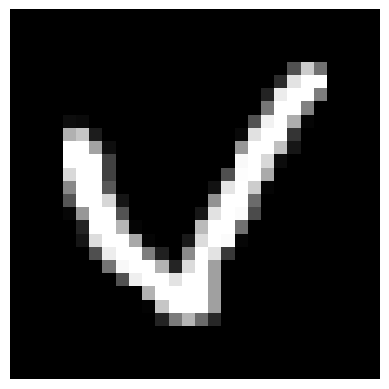

In [13]:
some_digit = x.iloc[[200]]
some_digit_image = some_digit.values.reshape(28,28)
plt.imshow(some_digit_image, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

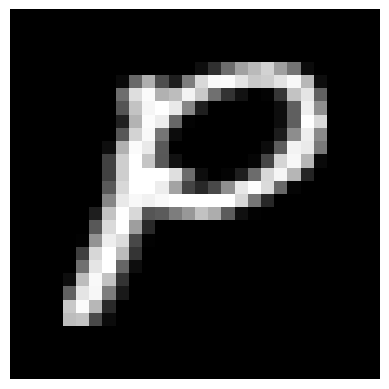

In [14]:
some_digit2 = x.iloc[[2300]]
some_digit_image2 = some_digit2.values.reshape(28,28)
plt.imshow(some_digit_image2, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")

**This are some example images of handwritten alphabets, which we tried to visualize using matplotlib.**

# **Step 3:** *Creating a predictive model using Artificial Neural Networks (ANN) and training it*

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
ann = models.Sequential([
        layers.Dense(784, activation='relu'),
        layers.Dense(800, activation='relu'),
        layers.Dense(800, activation='relu'),
        layers.Dense(800, activation='relu'),
        layers.Dense(26, activation='softmax')    
    ])


In [16]:
ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

training = ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
9063/9063 [==============================] - 40s 4ms/step - loss: 0.4518 - accuracy: 0.9029
Epoch 2/5
9063/9063 [==============================] - 36s 4ms/step - loss: 0.2291 - accuracy: 0.9460
Epoch 3/5
9063/9063 [==============================] - 35s 4ms/step - loss: 0.2017 - accuracy: 0.9554
Epoch 4/5
9063/9063 [==============================] - 36s 4ms/step - loss: 0.1863 - accuracy: 0.9602
Epoch 5/5
9063/9063 [==============================] - 35s 4ms/step - loss: 0.1965 - accuracy: 0.9604


In [17]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 800)               628000    
                                                                 
 dense_2 (Dense)             (None, 800)               640800    
                                                                 
 dense_3 (Dense)             (None, 800)               640800    
                                                                 
 dense_4 (Dense)             (None, 26)                20826     
                                                                 
Total params: 2,545,866
Trainable params: 2,545,866
Non-trainable params: 0
_________________________________________________________________


**With appropriate optimizer and loss functions, we are able to achieve an accuracy of about 96 percent for ANN.**

# **Step 4:** *Evaluating the performance model using the test data*

In [18]:
validation = ann.evaluate(x_test, y_test, batch_size=100)
print("test loss, test acc:", validation)

825/825 [==============================] - 3s 3ms/step - loss: 0.2214 - accuracy: 0.9589
test loss, test acc: [0.2213563323020935, 0.958896279335022]


In [19]:
validation.append('Validation')

In [20]:
train_loss = min(training.history['loss'])
train_acc = max(training.history['accuracy'])

In [21]:
x1 = [train_loss, train_acc, 'Training']

x2 = validation
p = pd.DataFrame([x1, x2])
p

,0,1,2
0,0.186313,0.960383,Training
1,0.221356,0.958896,Validation


In [22]:
p = p.rename(columns={0: 'Loss', 1: 'Accuracy', 2: ' '})
p

,Loss,Accuracy,
0,0.186313,0.960383,Training
1,0.221356,0.958896,Validation


In [23]:
p.set_index(' ', inplace=True)
p

,Loss,Accuracy
,,
Training,0.186313,0.960383
Validation,0.221356,0.958896


<Axes: xlabel=' '>

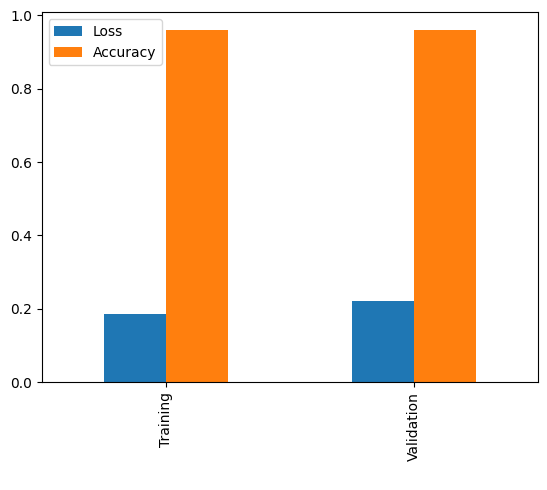

In [24]:
p.plot.bar()

In [25]:
predictions = ann.predict(x_test)
pred_res = predictions.argmax(axis=1)
pred_res

2577/2577 [==============================] - 4s 2ms/step


array([24,  2, 25, ..., 25, 24,  1])

In [26]:
index=0
incorrect=0
misclassified_img = []
for label, predict in zip(y_test, pred_res):
  if label != predict:
    misclassified_img.append(index)
    incorrect+=1
  index += 1

# **Understanding the overall working of the model**

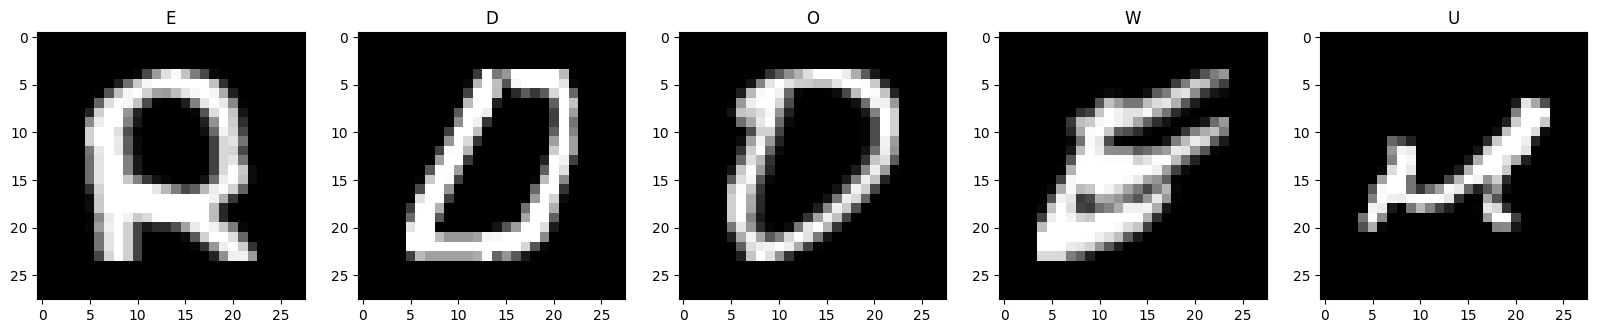

In [27]:
plt.figure(figsize=(20,4))
for plotindex,misindex in enumerate(misclassified_img[0:5]):
  plt.subplot(1, 5, plotindex+1)
  M=x_test.iloc[[misindex]]
  plt.imshow(np.reshape(M.values, (28,28)), cmap=plt.cm.gray)
  plt.title(chr(pred_res[misindex]+65))

In [28]:
index=0
correct = 0
classified_img = []
for label, predict in zip(y_test, pred_res):
  if label == predict:
    classified_img.append(index)
    correct+=1
  index += 1

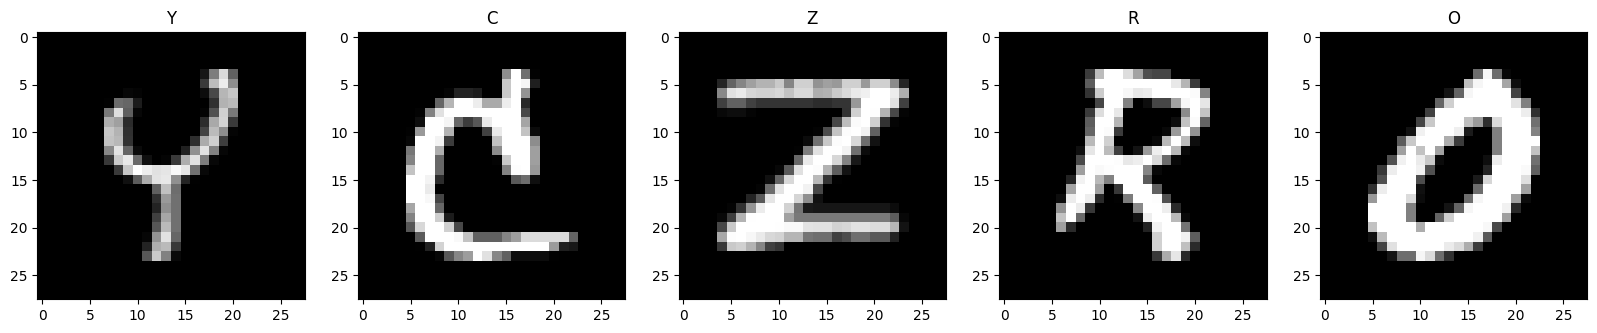

In [29]:
plt.figure(figsize=(20,4))
for plotindex,isindex in enumerate(classified_img[0:5]):
  plt.subplot(1, 5, plotindex+1)
  M=x_test.iloc[[isindex]]
  plt.imshow(np.reshape(M.values, (28,28)), cmap=plt.cm.gray)
  plt.title(chr(pred_res[isindex]+65))

In [30]:
print('Total images: ', correct+incorrect)
print('No. of images correctly recognized: ', correct)
print('No. of images correctly recognized: ', incorrect)
print('\n\nPercentage of images correctly recognized: ', (correct/(correct+incorrect))*100)
print('Percentage of images incorrectly recognized: ', (incorrect/(correct+incorrect))*100)

Total images:  82450
No. of images correctly recognized:  79061
No. of images correctly recognized:  3389


Percentage of images correctly recognized:  95.88963007883565
Percentage of images incorrectly recognized:  4.110369921164342


# **Conclusion**
The model is able to recognize handwritten alphabets with above **95 percent** accuracy. This clearly suggests that, even though the model misclassifies some of the handwritten alphabets, most of the letters are correctly recognized. The model is not biased, due to the negligible difference between ***training*** and ***testing*** accuracy. The project is able to achieve its objective. 


THANK YOU

